# Predict Customer Clicked Ads Classification

Table of Content:

- Introduction
- Load Dataset
- Exploratory Data Analysis
- Data Preprocessing
- Modeling
- Save Model

## Introduction

**Latar Belakang**

 Seiring perkembangan zaman, perusahaan harus mampu mengoptimalkan metode iklan mereka di platform digital untuk menarik calon pelanggan potensial dengan biaya minimal. Hal ini dilakukan dengan tujuan meningkatkan konversi, yaitu jumlah pelanggan potensial yang melakukan pembelian setelah mengklik iklan. Namun, untuk mencapai tujuan ini, perusahaan harus dapat melakukan prediksi click-through yang akurat. Click-through rate yang akurat sangat penting dalam menentukan keberhasilan kampanye iklan digital. Tanpa prediksi yang akurat, perusahaan mungkin akan mengeluarkan biaya yang besar tanpa hasil yang signifikan.

**Tujuan**

 Membuat model machine learning yang dapat mendeteksi pengguna potensial untuk konversi atau tertarik pada sebuah iklan, sehingga perusahaan bisa mengoptimalkan biaya dalam beriklan.

**Sasaran**

Memprediksi pengguna yang memiliki potensi untuk klik iklan atau tidak dengan akurasi 90%.
Mendapatkan insight mengenai pola pengguna potensial yang klik iklan.
Memberikan rekomendasi bisnis berdasarkan hasil analisis dan model.

**Metrik Bisnis**

Click-through rate (CTR)

 **Langkah-langkah**

1. Pengumpulan Data: Mengumpulkan data historis tentang kampanye iklan digital, termasuk data tentang pengguna, iklan, dan klik.
2. Pembersihan Data: Membersihkan data dari nilai yang hilang atau tidak konsisten.
3. Analisis Data: Menganalisis data untuk mengidentifikasi pola dan faktor yang berkontribusi pada click-through.
4. Pemilihan Model: Memilih model machine learning yang sesuai untuk memprediksi click-through.
5. Pelatihan Model: Melatih model machine learning dengan data yang telah dibersihkan dan dianalisis.
6. Evaluasi Model: Mengevaluasi performa model machine learning dengan menggunakan data yang belum digunakan untuk pelatihan.
7. Penyebaran Model: Menyebarkan model machine learning ke platform produksi untuk digunakan dalam kampanye iklan digital.

 **Manfaat**

- Meningkatkan efisiensi kampanye iklan digital dengan menargetkan pengguna yang lebih berpotensi untuk konversi.
- Meningkatkan click-through rate dan ROI (Return on Investment) dari kampanye iklan digital.
- Mendapatkan insight yang lebih baik tentang perilaku pengguna dan faktor yang mempengaruhi click-through.
- Meningkatkan pengambilan keputusan dalam strategi iklan digital.

 **Kesimpulan**

 Membangun model machine learning untuk memprediksi click-through rate dapat membantu perusahaan mengoptimalkan kampanye iklan digital mereka, meningkatkan efisiensi dan ROI, serta mendapatkan insight yang lebih baik tentang perilaku pengguna.

 **Catatan:**

- Ini adalah gambaran umum dari proses membangun model machine learning untuk prediksi click-through rate. Detailnya dapat bervariasi tergantung pada situasi dan data yang tersedia.
- Penting untuk memilih model yang tepat dan melatihnya dengan data yang cukup untuk mencapai akurasi yang tinggi.
- Model machine learning harus dipantau dan diperbarui secara berkala untuk memastikan performanya tetap optimal.

## Load Dataset

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Clicked Ads Dataset.csv')
df.sample(3)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
312,312,75.55,22,292959660.0,169.40,Perempuan,2/19/2016 7:29,Yes,Jakarta Utara,Daerah Khusus Ibukota Jakarta,Finance
685,685,76.27,27,420578620.0,226.69,Laki-Laki,6/18/2016 1:42,No,Cimahi,Jawa Barat,Travel
530,530,65.10,49,416202640.0,118.10,Laki-Laki,6/1/2016 3:44,Yes,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Furniture


## Exploratory Data Analysis

### Overview Data

Melakukan investigasi awal terhadap data untuk memahami karakteristik dan informasi yang terkandung didalamnya termasuk missing value dan duplikat.

In [3]:
df.shape

(1000, 11)

In [4]:
# overview
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round(100*df[col].isna().sum()/len(df[col]), 2), df[col].nunique(), df[col].unique()[:10]])
desc_df = pd.DataFrame(data=list_item, columns='feature, data_type, null_values, null_percentage, unique_values, unique_sample'.split(","))
desc_df

,feature,data_type,null_values,null_percentage,unique_values,unique_sample
0,Unnamed: 0,int64,0,0.0,1000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]"
1,Daily Time Spent on Site,float64,13,1.3,890,"[68.95, 80.23, 69.47, 74.15, 68.37, 59.99, 88...."
2,Age,int64,0,0.0,43,"[35, 31, 26, 29, 23, 33, 48, 30, 20, 49]"
3,Area Income,float64,13,1.3,987,"[432837300.0, 479092950.00000006, 418501580.0,..."
4,Daily Internet Usage,float64,11,1.1,955,"[256.09, 193.77, 236.5, 245.89, 225.58, 226.74..."
5,Male,object,3,0.3,2,"[Perempuan, Laki-Laki, nan]"
6,Timestamp,object,0,0.0,997,"[3/27/2016 0:53, 4/4/2016 1:39, 3/13/2016 20:3..."
7,Clicked on Ad,object,0,0.0,2,"[No, Yes]"
8,city,object,0,0.0,30,"[Jakarta Timur, Denpasar, Surabaya, Batam, Med..."
9,province,object,0,0.0,16,"[Daerah Khusus Ibukota Jakarta, Bali, Jawa Tim..."


In [5]:
df.duplicated().sum()

0

In [6]:
# numerikal fitur
nums = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == float)].columns.tolist()
nums

['Unnamed: 0',
 'Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage']

In [7]:
# kategorikal fitur
cats = df.loc[:, (df.dtypes == 'object')].columns.tolist()
cats

['Male', 'Timestamp', 'Clicked on Ad', 'city', 'province', 'category']

## **Poin-poin Penting:**

 **Karakteristik Data:**

- Dataset terdiri dari 1000 baris dan 11 fitur.
- 5 fitur numerik dan 6 fitur kategorik.

 **Missing Value:**

- Terdapat missing value pada fitur:
    - Daily Time Spent on Site
    - Area Income
    - Daily Internet Usage
    - Male

 **Duplikat Data:**
- Tidak ada duplikat data dalam dataset.
 
 **Timestamp:**

- Direkomendasikan untuk menggunakan tipe data datetime untuk timestamp.
- Ekstraksi timestamp juga dapat dilakukan.

**Rekomendasi:**
- **Penanganan Missing Value:**
    - Gunakan metode yang sesuai untuk menangani missing value, seperti imputasi atau penghapusan data.
    - Pilihan metode tergantung pada karakteristik data dan tujuan analisis.

- **Tipe Data:**
    - Pastikan tipe data untuk setiap fitur sesuai dengan karakteristik datanya.
    - Gunakan tipe data datetime untuk timestamp.

- **Analisis Data:**
    - Lakukan analisis data untuk menjawab pertanyaan bisnis Anda.
    - Gunakan berbagai teknik statistik dan machine learning untuk mendapatkan insights dari data.

## Statistical Summary

In [8]:
df[nums].describe().round(0).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,500.0,289.0,0.0,250.0,500.0,749.0,999.0
Daily Time Spent on Site,987.0,65.0,16.0,33.0,51.0,68.0,78.0,91.0
Age,1000.0,36.0,9.0,19.0,29.0,35.0,42.0,61.0
Area Income,987.0,384864671.0,94079990.0,97975500.0,328632990.0,399068320.0,458355450.0,556393600.0
Daily Internet Usage,989.0,180.0,44.0,105.0,139.0,183.0,219.0,267.0


**Key Takeaways:**

- Dilihat dari nilai mean dan median yang tidak begitu jauh nilainya, distribusi data cenderung mendekati normal
- Mayoritas user menghabiskan **waktu di suatu situs adalah 68 menit (1 jam)**
- Mayoritas **pemakaian internet harian user** adalah **183 menit (3 jam)**
- Mayoritas **pendapatan user Rp399.068.320/tahun**
- Rentang usia user 19 – 61 tahun, dengan mayoritas **35 tahun**

In [9]:
df[cats].describe().T

,count,unique,top,freq
Male,997,2,Perempuan,518
Timestamp,1000,997,5/26/2016 15:40,2
Clicked on Ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


**Key Takeaways:**

- Fitur target atau Clicked on Ad memiliki jumlah value **Yes** dan **No** yang **seimbang**
- Akurasi cocok digunakan untuk data yang seimbang. Akurasi menggambarkan seberapa sering model membuat prediksi yang benar

## Univariate Analysis

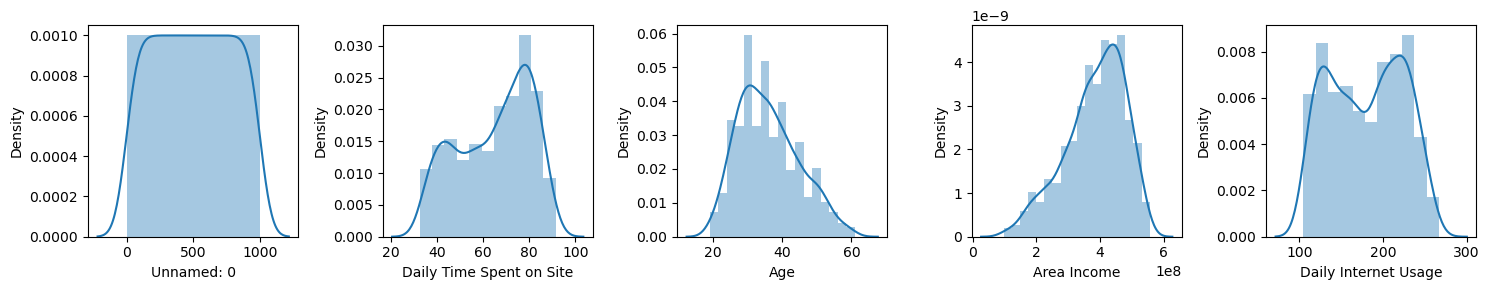

In [10]:
# distribusi menggunakan displot
plt.figure(figsize=(15, 3))
for i in range(0, len(nums)):
    plt.subplot(1, 5, i+1)
    sns.distplot(df[nums[i]])
    plt.tight_layout()

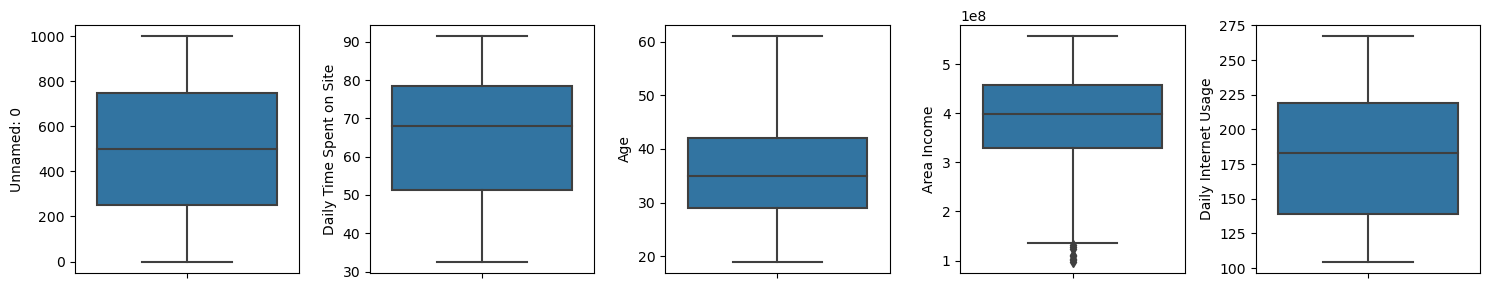

In [11]:
# distribusi menggunakan boxplot
plt.figure(figsize=(15, 3))
for i in range(0, len(nums)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(df, y=df[nums[i]], orient='v')
    plt.tight_layout()

**Key Takeaways:**

- Fitur `Area Income` memiliki outlier, namun masih dapat ditoleransi karena bukan nilai yang ekstrim

In [12]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print('-' * 50)
    print(df[col].value_counts())
    print()

Value count kolom Male:
--------------------------------------------------
Perempuan    518
Laki-Laki    479
Name: Male, dtype: int64

Value count kolom Timestamp:
--------------------------------------------------
5/26/2016 15:40    2
5/30/2016 8:02     2
5/20/2016 12:17    2
5/15/2016 3:10     1
4/5/2016 8:18      1
                  ..
5/12/2016 4:35     1
1/1/2016 21:58     1
3/13/2016 13:50    1
7/16/2016 14:13    1
6/3/2016 21:43     1
Name: Timestamp, Length: 997, dtype: int64

Value count kolom Clicked on Ad:
--------------------------------------------------
No     500
Yes    500
Name: Clicked on Ad, dtype: int64

Value count kolom city:
--------------------------------------------------
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tanger

## Bivariate Analysis

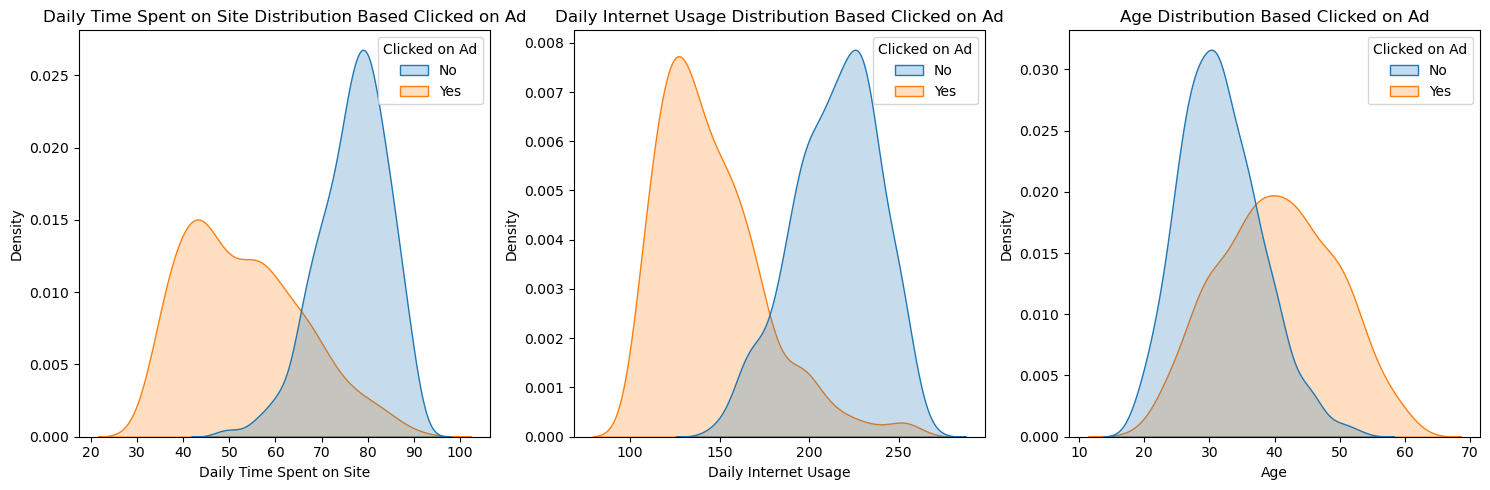

In [16]:
feats = ['Daily Time Spent on Site', 'Daily Internet Usage', 'Age']

plt.figure(figsize=(15, 5))
for i in range(0, len(feats)):
    plt.subplot(1, 3, i+1)
    sns.kdeplot(df, x=df[feats[i]], hue=df['Clicked on Ad'], fill=True).set(title=f'{feats[i]} Distribution Based Clicked on Ad')
    plt.tight_layout()

## Numerical Feature and Click on Ads

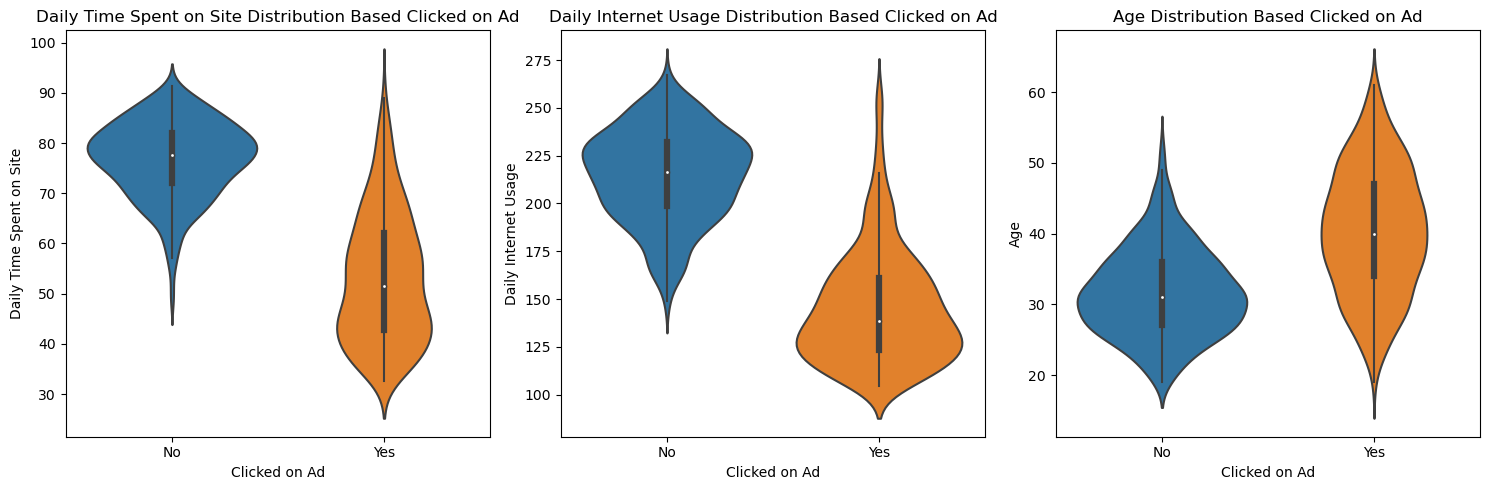

In [14]:
# distribusi menggunakan violinplot
plt.figure(figsize=(15, 5))
for i in range(0, len(feats)):
    plt.subplot(1, 3, i+1)
    sns.violinplot(df, y=df[feats[i]], x=df['Clicked on Ad']).set(title=f'{feats[i]} Distribution Based Clicked on Ad')
    plt.tight_layout()

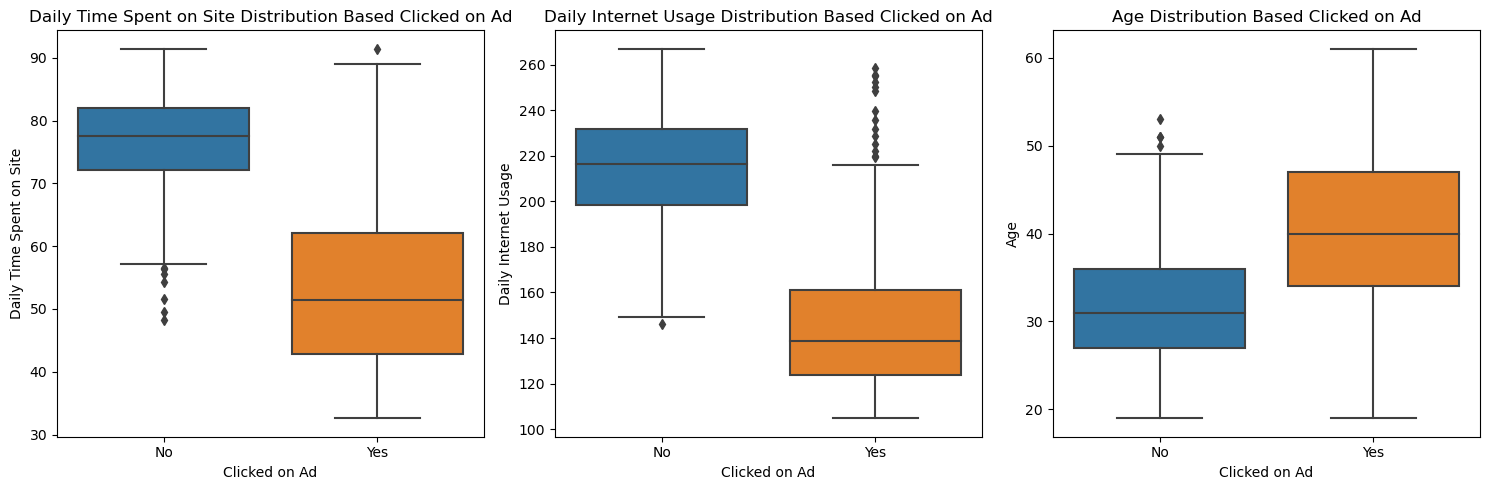

In [15]:
# distribusi menggunakan boxplot
plt.figure(figsize=(15, 5))
for i in range(0, len(feats)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(df, y=df[feats[i]], x=df['Clicked on Ad'], orient='v').set(title=f'{feats[i]} Distribution Based Clicked on Ad')
    plt.tight_layout()

**Key Takeways:**

- **Daily Time Spent**<br>
User yang jarang menghabiskan waktu di sebuah situs (kurang dari 1 jam) memiliki potensi untuk mengklik iklan yang lebih besar

- **Daily Internet Usage**<br>
User yang jarang menggunakan internet memiliki potensi untuk mengklik iklan yang lebih besar dibandingkan user yang sering menggunakan internet. User internet yang jarang menggunakan internet mungkin memiliki rasa ingin tahu yang lebih besar tentang produk atau layanan yang ditawarkan melalui iklan. Karena mereka kurang terbiasa dengan internet, mereka mungkin merasa tertarik dengan iklan dan ingin mengetahui lebih banyak tentang produk. Kemungkinan lainnya adalah karena keterbatasan akses internet pada informasi yang ditawarkan, ketika user menemukan iklan yang menarik, mereka lebih mungkin untuk mengklik iklan tersebut untuk mendapatkan informasi yang lebih lengkap.

- **Age**<br>
User yang lebih tua memiliki potensi mengklik iklan yang lebih besar. Kumungkinan pengguna internet yang lebih muda lebih terbiasa dengan teknologi dan internet, sehingga mereka mungkin lebih mampu menemukan informasi yang mereka butuhkan melalui sumber lain selain iklan. Mereka mungkin juga lebih kritis dalam menilai iklan, dan lebih memilih untuk menghindari iklan yang terlalu mengganggu atau tidak relevan.

## Categorical Feature and Click on Ads

In [19]:
def ratio_with_target(feats):
    ratio_df = df.groupby([feats,'Clicked on Ad']).agg({'Unnamed: 0' : 'count'}).reset_index()
    ratio_df.columns = [feats,'Clicked on Ad','total']
    ratio_df['ratio'] = ratio_df.groupby(feats).apply(lambda x: round(x.total/x.total.sum() *100, 0)).values.astype(int)
    ratio_df = ratio_df.pivot_table(index=feats, columns='Clicked on Ad', values='ratio')
    ratio_df = ratio_df.sort_values(by=['Yes'], ascending=True)
    return ratio_df

#---------------------------------------------------------------------------------------------------------

# visualisasi
def cat_visualization(fitur, judul):
    fig, ax = plt.subplots(1,2, figsize=(15,7))
    
    # count
    ax[0].set_title(f'Clicked on Ad Distribution by {judul}\n', fontsize=14)
    sns.countplot(y=fitur, data = df, hue = 'Clicked on Ad', ax=ax[0], palette = ['#1f77b4', '#ff7f0e'],
                 order = df[fitur].value_counts().index)
    ax[0].bar_label(ax[0].containers[0], fontsize=11) 
    ax[0].bar_label(ax[0].containers[1], fontsize=11)
    ax[0].set_xlabel('')
    ax[0].set_ylabel('')
    
    
    #percentage
    ax[1].set_title(f'Pecentage of Clicked on Ad by {judul}\n', fontsize=14)
    ratio_with_target(fitur).plot(kind='barh', stacked=True, ax=ax[1], color = ['#1f77b4', '#ff7f0e'])
    for p in ax[1].patches:
        left, bottom, width, height = p.get_bbox().bounds
        if width != 0:
            ax[1].annotate((str(round(width, 2))+'%'), xy=(left+width/2, bottom+height/2), 
                        ha='center', va='center', fontsize=12)
    plt.legend([])
    ax[1].set_xticks([])
    ax[1].set_xlabel('')
    ax[1].set_ylabel('')

    plt.tight_layout()
    plt.show()

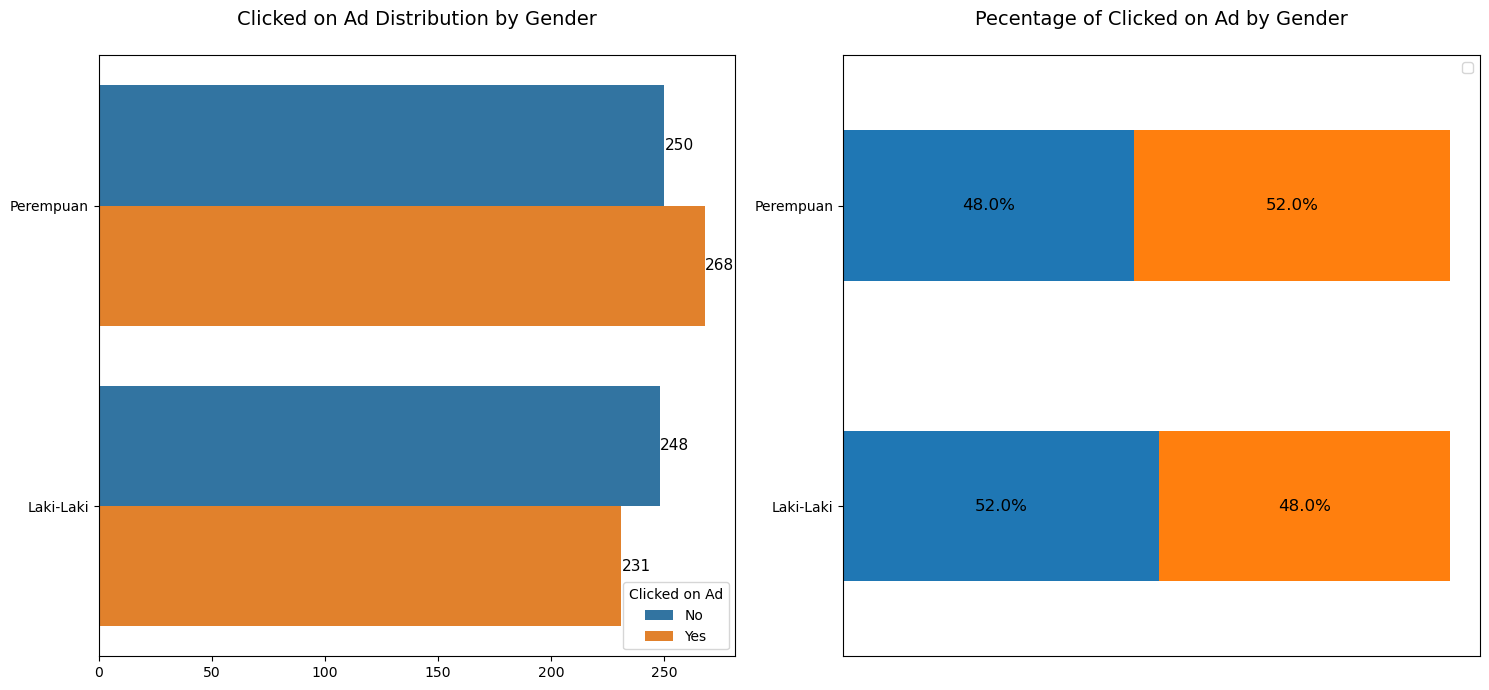

In [20]:
cat_visualization('Male', 'Gender')